# 1. Financial market data
## 1.1 Stylized facts of financial market returns
### 1.1.1 Stylized facts for univariate series
   - Time series data of returns, in particular daily return series, are in general not independent and identically distributed (iid). This fact is not jeopardized by low absolute values of the first-order autocorrelation coefficient.
   - The volatility of return processes is not constant with respect to time.
   - The absolute or squared returns are highly autocorrelated.【也表明了volatility clustering的存在】
   - The distribution of financial market returns is leptokurtic. The occurrence of extreme events is more likely compared to the normal distribution.
   - Extreme returns are observed closely in time (volatility clustering).
   - The empirical distribution of returns is skewed to the left; negative returns are more likely to occur than positive ones.

Warning message:
"package 'fBasics' was built under R version 3.4.3"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.4.3"

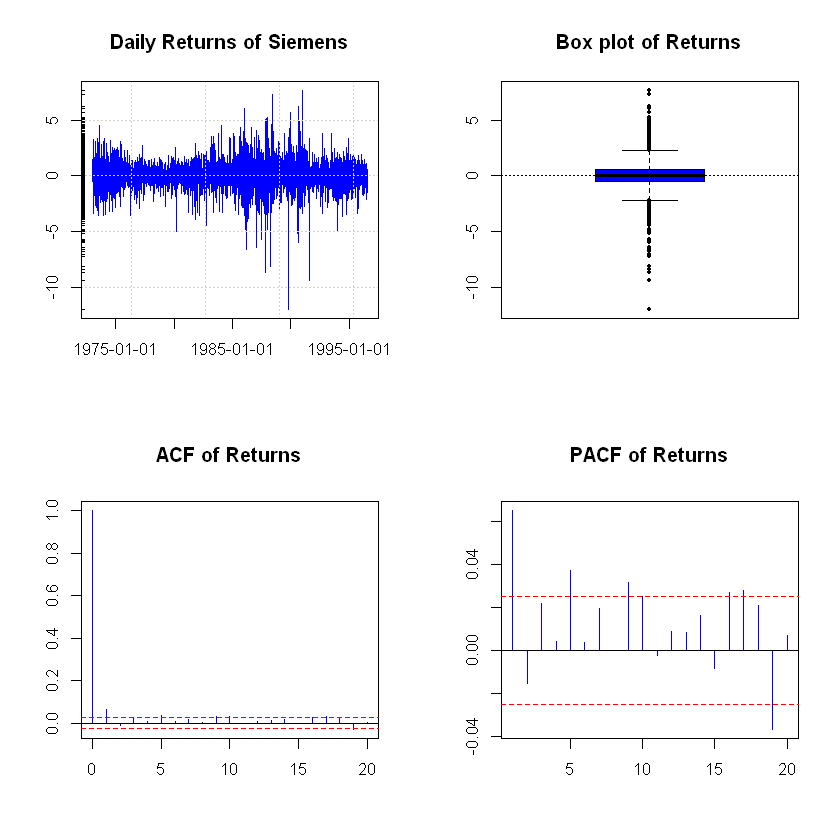

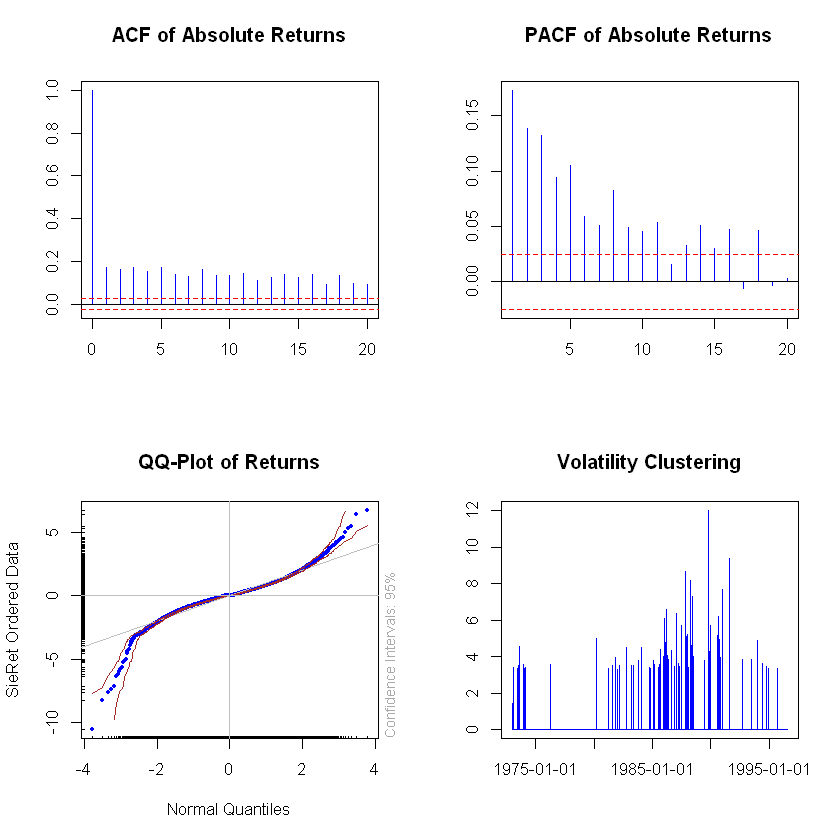

In [1]:
# Stylized facts on the returns for Siemens
library(fBasics)
library(evir)
data(siemens)
SieDates <- as.character(format(as.POSIXct(attr(siemens, "times")),
                                "%Y-%m-%d"))
SieRet <- timeSeries(siemens * 100, charvec = SieDates)
colnames(SieRet) <- "SieRet"
## Stylised Facts I
par(mfrow = c(2, 2))
seriesPlot(SieRet, title = FALSE, main = "Daily Returns of Siemens",
           col = "blue")
boxPlot(SieRet, title = FALSE, main = "Box plot of Returns",
        col = "blue", cex = 0.5, pch = 19)
acf(SieRet, main = "ACF of Returns", lag.max = 20, ylab = "",
    xlab = "", col = "blue", ci.col = "red")
pacf(SieRet, main = "PACF of Returns", lag.max = 20, ylab = "",
     xlab = "", col = "blue", ci.col = "red")
## Stylised Facts II
SieRetAbs <- abs(SieRet)
SieRet100 <- tail(sort(abs(series(SieRet))), 100)[1]
idx <- which(series(SieRetAbs) > SieRet100, arr.ind = TRUE)
SieRetAbs100 <- timeSeries(rep(0, length(SieRet)),
                           charvec = time(SieRet))
SieRetAbs100[idx, 1] <- SieRetAbs[idx]
acf(SieRetAbs, main = "ACF of Absolute Returns", lag.max = 20,
    ylab = "", xlab = "", col = "blue", ci.col = "red")
pacf(SieRetAbs, main = "PACF of Absolute Returns", lag.max = 20,
     ylab = "", xlab = "", col = "blue", ci.col = "red")
qqnormPlot(SieRet, main = "QQ-Plot of Returns", title = FALSE,
           col = "blue", cex = 0.5, pch = 19)
plot(SieRetAbs100, type = "h", main = "Volatility Clustering",
     ylab = "", xlab = "", col = "blue")


### 1.1.2 Stylized facts for multivariate series
* The absolute value of cross-correlations between return series is less pronounced and contemporaneous correlations are in general the strongest.
* In contrast, the absolute or squared returns do show high cross-correlations. This empirical finding is similar to the univariate case.
* Contemporaneous correlations are not constant over time.
* Extreme observations in one return series are often accompanied by extremes in the other return series.

Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following object is masked from 'package:timeSeries':

    time<-

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



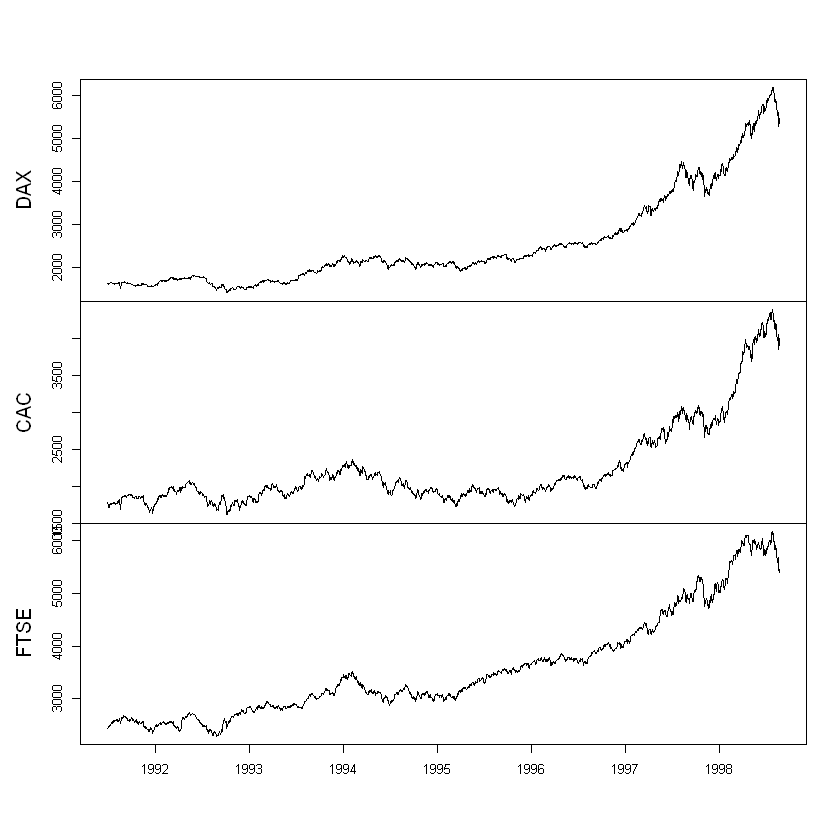

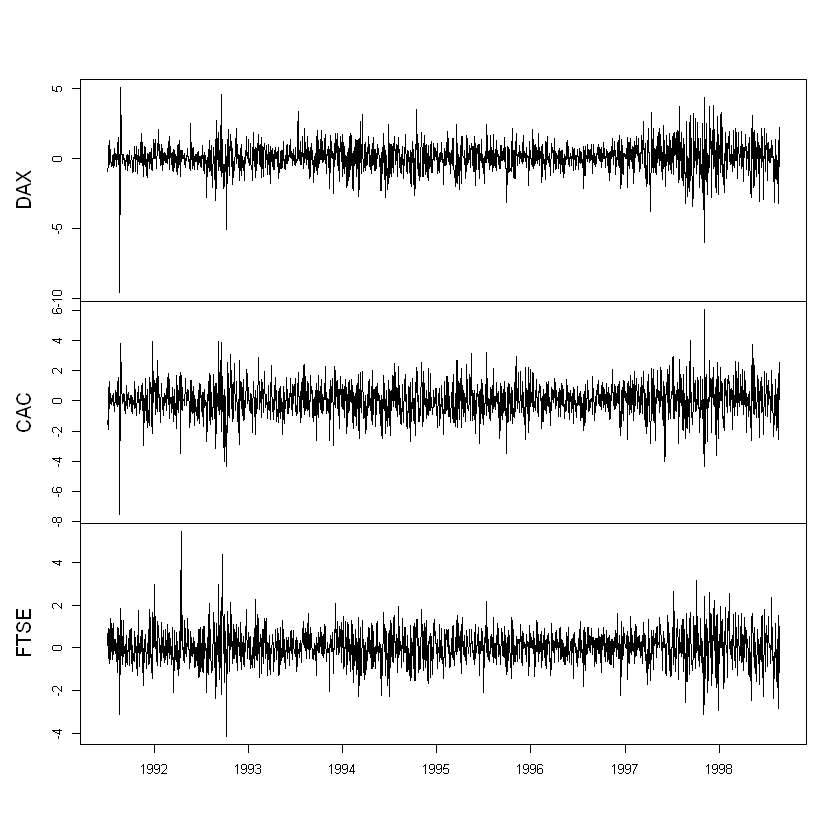

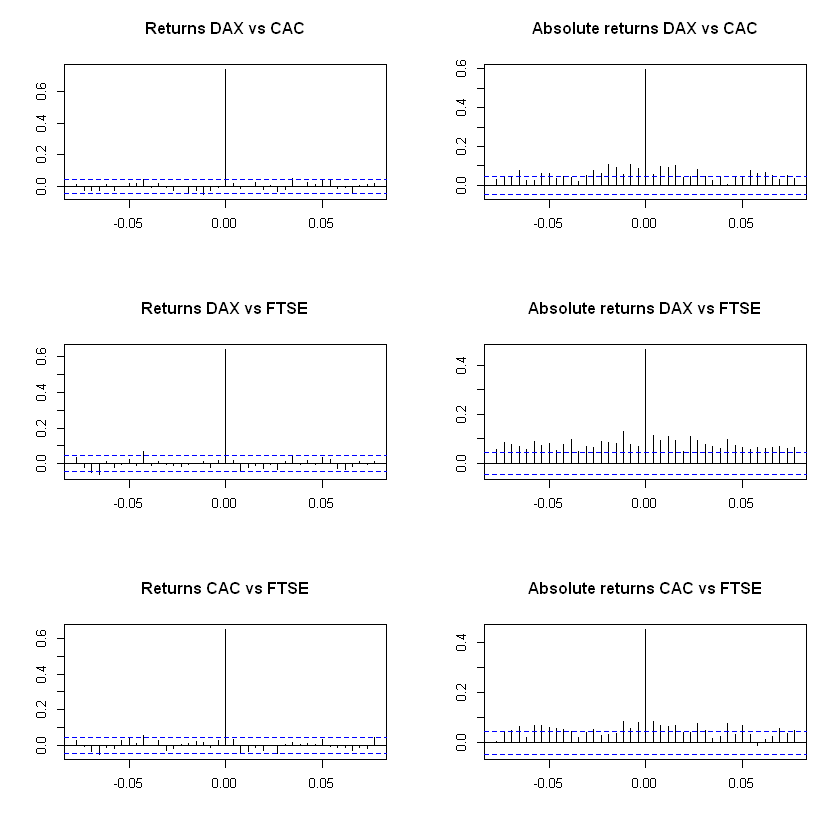

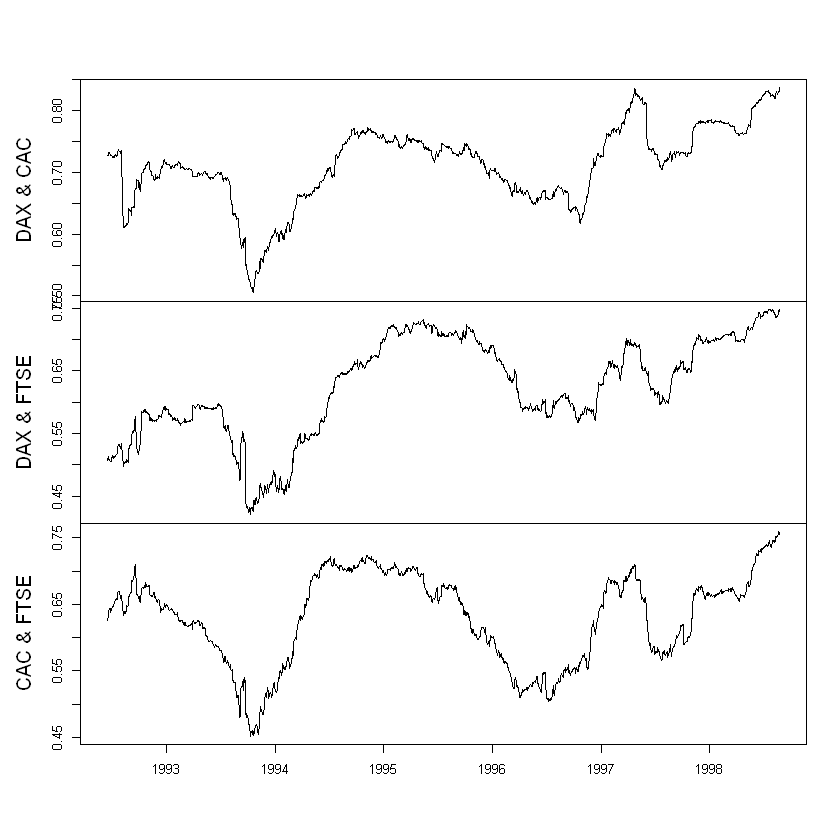

In [2]:
# Stylized facts on the European equity market.
library(zoo)
data(EuStockMarkets)
## Time Series plot of Levels
EuStockLevel <- as.zoo(EuStockMarkets)[, c("DAX", "CAC", "FTSE")]
plot(EuStockLevel, xlab = "", main = "")
## Perecntage returns
EuStockRet <- diff(log(EuStockLevel)) * 100
plot(EuStockRet, xlab = "", main = "")
## Cross correlations
layout(matrix(1:6, nrow = 3, ncol = 2, byrow = TRUE))
ccf(EuStockRet[, 1], EuStockRet[, 2], ylab = "", xlab = "",
    lag.max = 20, main = "Returns DAX vs CAC")
ccf(abs(EuStockRet)[, 1], abs(EuStockRet)[, 2], ylab = "",
    xlab = "", lag.max = 20, main = "Absolute returns DAX vs CAC")
ccf(EuStockRet[, 1], EuStockRet[, 3], ylab = "", xlab = "",
    lag.max = 20, main = "Returns DAX vs FTSE")
ccf(abs(EuStockRet)[, 1], abs(EuStockRet)[, 3], ylab = "",
    xlab = "", lag.max = 20, main = "Absolute returns DAX vs FTSE")
ccf(EuStockRet[, 2], EuStockRet[, 3], ylab = "", xlab = "",
    lag.max = 20, main = "Returns CAC vs FTSE")
ccf(abs(EuStockRet)[, 2], abs(EuStockRet)[, 3], ylab = "",
    xlab = "", lag.max = 20, main = "Absolute returns CAC vs FTSE")
## Rolling correlations
rollc <- function(x){
  dim <- ncol(x) # “列”数
  rcor <- cor(x)[lower.tri(diag(dim), diag = FALSE)] # cor(EuStockRet)[lower.tri(diag(3), diag = FALSE)] ; upper.tri(diag(3))
  return(rcor)
}
rcor <- rollapply(EuStockRet, width = 250, rollc,
                  align = "right", by.column = FALSE)
colnames(rcor) <- c("DAX & CAC", "DAX & FTSE", "CAC & FTSE")
plot(rcor, main = "", xlab = "")


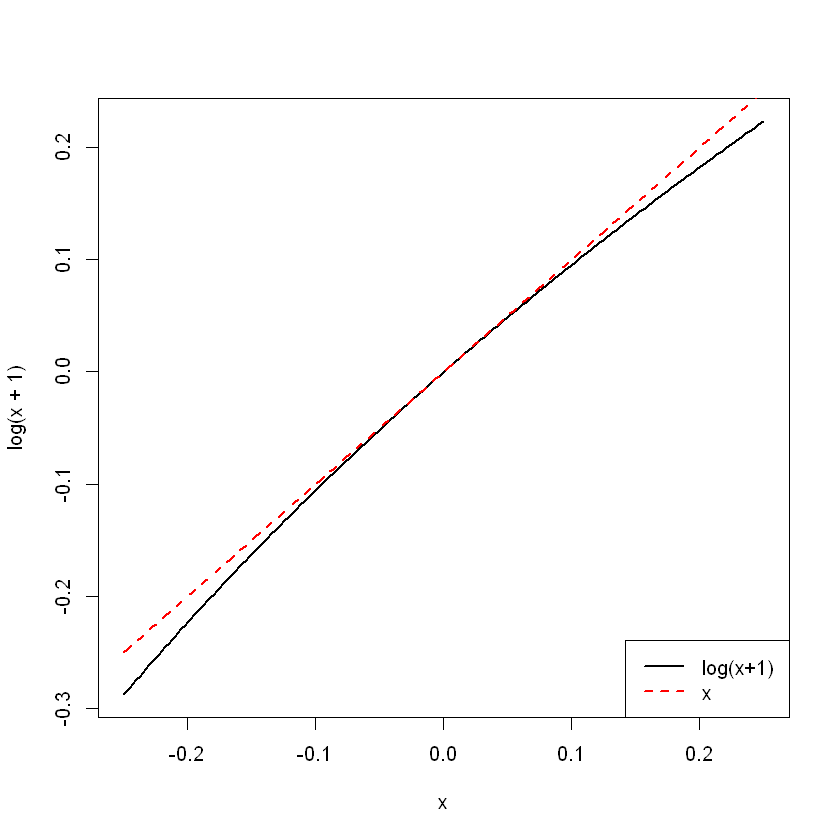

In [14]:
x= seq(-.25,.25,length=200)
plot(x,log(x+1),type="l",lwd=2)
lines(x,x,lty=2,lwd=2,col="red")
legend("bottomright",c("log(x+1)","x"),lty=c(1,2),lwd=2,col=c("black","red"))

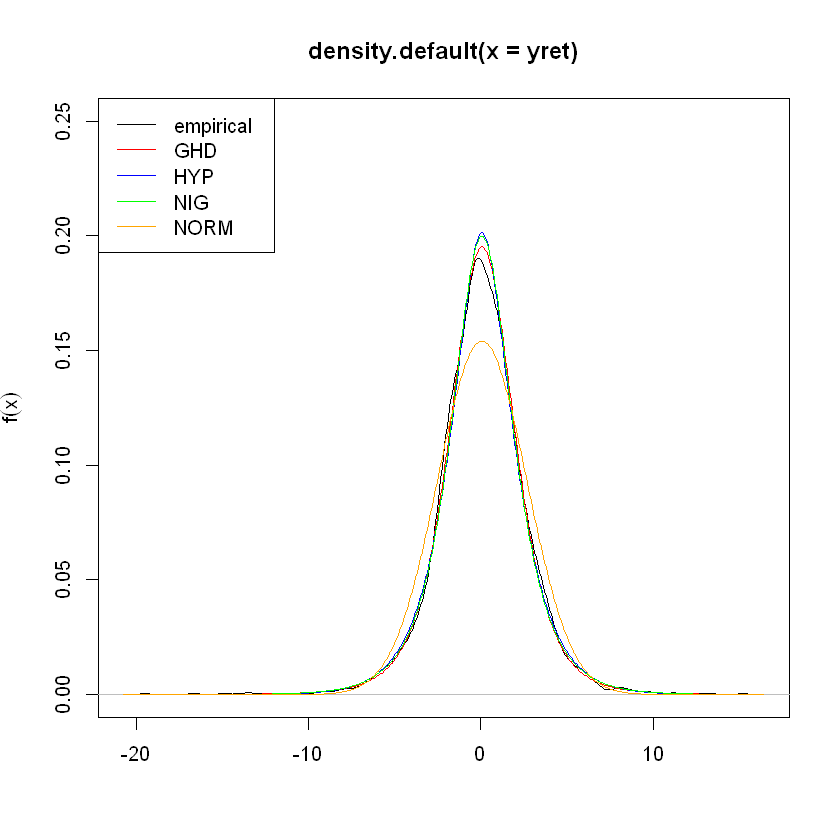

Currently fitting: asymmetric ghyp 
Currently fitting: asymmetric hyp 
Currently fitting: asymmetric NIG 


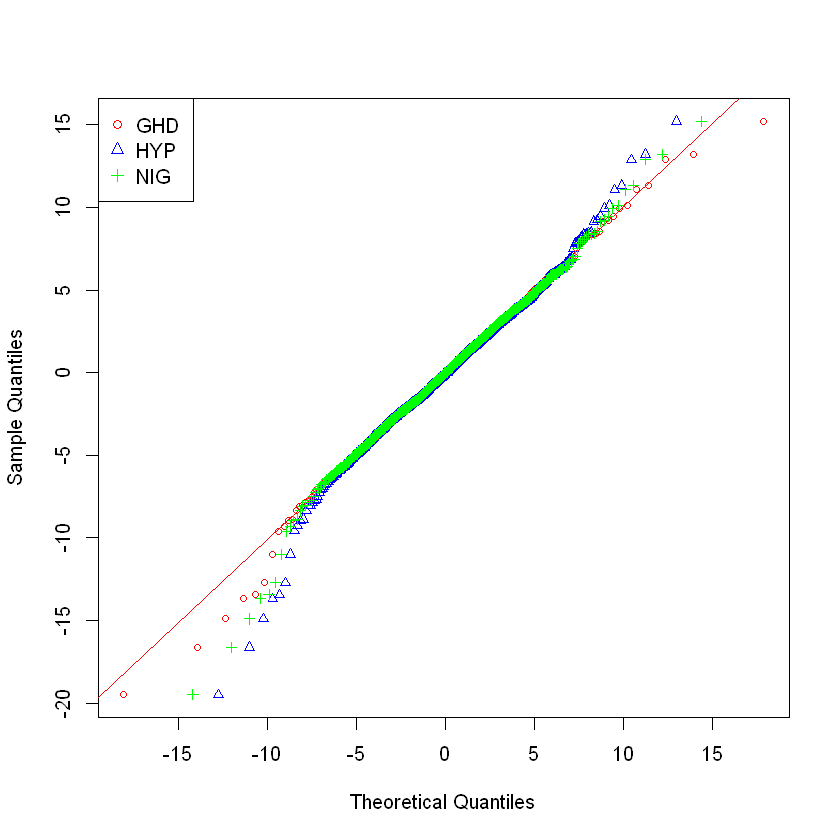

In [25]:
library(ghyp)
library(timeSeries)
library(fBasics)
## Return calculation
data(DowJones30)
y <- timeSeries(DowJones30[, "HWP"], charvec =
                as.character(DowJones30[, 1])) 
yret <- na.omit(diff(log(y)) * 100)
## Fitting
ef <- density(yret)
ghdfit <- fit.ghypuv(yret, symmetric = FALSE,
                     control = list(maxit = 1000),silent=TRUE) # silent = FALSE
hypfit <- fit.hypuv(yret, symmetric = FALSE,
                    control = list(maxit = 1000),silent=TRUE) # silent = FALSE
nigfit <- fit.NIGuv(yret, symmetric = FALSE,
                    control = list(maxit = 1000),silent=TRUE) # silent = FALSE
## Densities
ghddens <- dghyp(ef$x, ghdfit)
hypdens <- dghyp(ef$x, hypfit)
nigdens <- dghyp(ef$x, nigfit)
nordens <- dnorm(ef$x, mean = mean(yret), sd = sd(c(yret[, 1])))
col.def <- c("black", "red", "blue", "green", "orange")
plot(ef, xlab = "", ylab = expression(f(x)), ylim = c(0, 0.25))
lines(ef$x, ghddens, col = "red")
lines(ef$x, hypdens, col = "blue")
lines(ef$x, nigdens, col = "green")
lines(ef$x, nordens, col = "orange")
legend("topleft",
       legend = c("empirical", "GHD", "HYP", "NIG", "NORM"),
       col = col.def, lty = 1)
## QQ-Plots
qqghyp(ghdfit, line = TRUE, ghyp.col = "red", plot.legend = FALSE,
       gaussian = FALSE, main = "", cex = 0.8)
qqghyp(hypfit, add = TRUE, ghyp.pch = 2, ghyp.col = "blue",
       gaussian = FALSE, line = FALSE, cex = 0.8)
qqghyp(nigfit, add = TRUE, ghyp.pch = 3, ghyp.col = "green",
       gaussian = FALSE, line = FALSE, cex = 0.8)
legend("topleft", legend = c("GHD", "HYP", "NIG"),
       col = col.def[-c(1,5)], pch = 1:3)
## Diagnostics
AIC <- stepAIC.ghyp(yret, dist = c("ghyp", "hyp", "NIG"),
                    symmetric = FALSE,
                    control = list(maxit = 1000),silent = TRUE) # silent = FALSE
LRghdnig <- lik.ratio.test(ghdfit, nigfit)
LRghdhyp <- lik.ratio.test(ghdfit, hypfit)


In [24]:
?stepAIC.ghyp